In [287]:
sns.blend_palette(rgb, as_cmap=True)

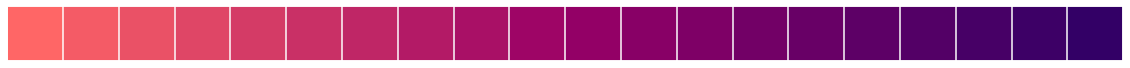

In [585]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import pandas as pd

sns.set_theme(style="darkgrid")
sns.color_palette("rocket", as_cmap=True)
sns.color_palette("rocket")
sns.set_context("talk")

# Kompasbank color palette

rgb = np.array([(1, 0.4, 0.4), (0.6, 0, 0.4), (0.2, 0, 0.4)])
kb_palette = lambda n: sns.blend_palette(rgb, n_colors=n)

sns.palplot(sns.blend_palette(rgb, n_colors=20))

# Fall of credit institutions

In [526]:
# credit institutions

perc = 0.04
x = np.arange(2008,2026)
y = np.array([8162, 8003, 7865, 7720, 7518, 7368, 6906, 6688, 6241, 5880, 5698, 5581, 5441, 0, 0, 0, 0, 0])

# 4 percent consolidation
for i in range(13, 13 + len(y[13:])):
    y[i] = y[i-1] - y[i-1]*perc

In [527]:
# kb_palette(len(y))
# sns.color_palette('rocket', len(y))

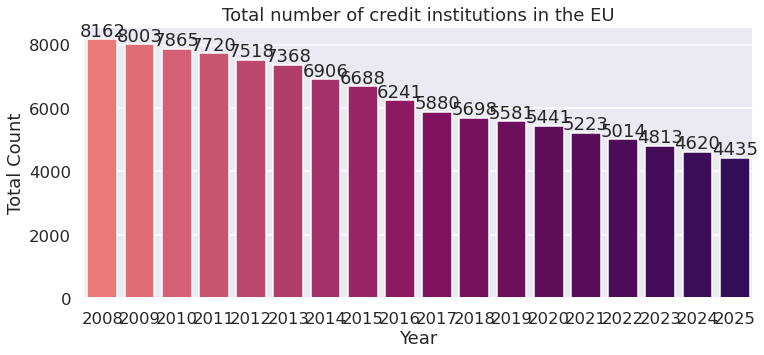

In [528]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

df = pd.DataFrame(np.column_stack([x,y]), columns = ['Year','Total Count'])

ax = sns.barplot(x = "Year", y = "Total Count", data=df, palette = kb_palette(len(y)))
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 100, y[i], ha="center")

ax.set_title("Total number of credit institutions in the EU")
plt.savefig('01.png', dpi=300)
plt.show()

# SME annual revenue pool growth

In [261]:
x = np.arange(2020, 2028)
y = np.zeros(len(x))
y[0] = 8.5e+11 # $ 850 billion

perc = 0.07
for i in range(1, len(y)):
    y[i] = y[i-1] + y[i-1]*perc
    
y.astype('int')

array([ 850000000000,  909500000000,  973165000000, 1041286550000,
       1114176608500, 1192168971095, 1275620799071, 1364914255006])

In [264]:
#!pip install numerize
from numerize import numerize

  Preparing metadata (setup.py) ... done
  Created wheel for numerize: filename=numerize-0.12-py3-none-any.whl size=3173 sha256=4069c938fef1b3eb89501fe8c20763906c5206ad11bf27c5616d8a1a4c01929d
  Stored in directory: /home/ec2-user/.cache/pip/wheels/05/b3/25/542e64f730a01aa82804da67506fe5ab1904dc0bf826e125c4
Successfully built numerize


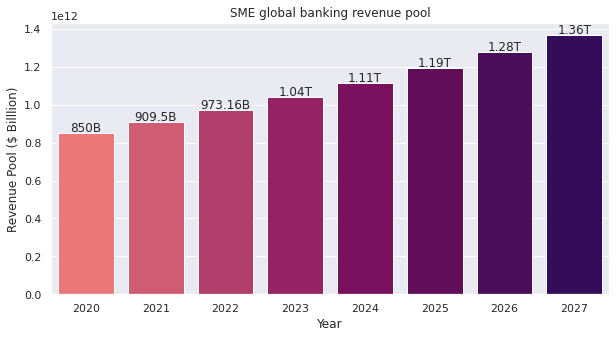

In [278]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

df = pd.DataFrame(np.column_stack([x,y]), columns = ['Year','Revenue Pool ($ Billlion)'])
df['Year'] = df['Year'].astype('int')
df['Revenue Pool ($ Billlion)'] = df['Revenue Pool ($ Billlion)'].astype('int')

ax = sns.barplot(x = "Year", y = "Revenue Pool ($ Billlion)", data=df, palette = kb_palette(len(y)))
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + height / 100, numerize.numerize(y[i]), ha="center")

ax.set_title("SME global banking revenue pool")
plt.savefig('02.png', dpi=300)
plt.show()

# Market growth

Revenue or total assets

In [221]:
# credit institutions

x1 = np.arange(2014,2020)
y1 = np.array([31.2, 30.8, 30.9, 30.4, 30.9, 32.4])

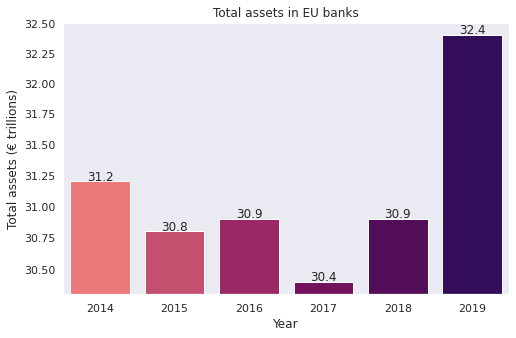

In [205]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

df = pd.DataFrame(np.column_stack([x1,y1]), columns = ['Year','Total assets (€ trillions)'])
df.Year = df.Year.astype('int')

ax = sns.barplot(x = "Year", y = "Total assets (€ trillions)", data=df, palette = kb_palette(len(y1)))
ax.set(yscale="log")
ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.01, y1[i], ha="center")

ax.set_title("Total assets in EU banks")
plt.savefig('03.png', dpi=300)
plt.show()

Not enough data to trust the results... But negative coefficient (first return value) implies that as number of credit institutions fall the total assets in EU increases.

# Bond yield

In [578]:
df = pd.read_csv('data/us-10y-bond-yield.csv')
df.head()

,Date,Price,Open,High,Low,Change %
0,Jul 22,3.047,3.022,3.101,2.756,1.01%
1,Jun 22,3.017,2.864,3.498,2.833,5.86%
2,May 22,2.849,2.932,3.203,2.706,-3.00%
3,Apr 22,2.938,2.352,2.981,2.352,25.26%
4,Mar 22,2.345,1.840,2.557,1.668,28.74%


In [579]:
# prefix
prefix_ = [x[:2] for x in np.arange(1980, 2023).astype('str')]
# add to date
df[['Month', 'Year']] = df['Date'].str.split(' ', 1, expand=True)
# fix year format
df.iloc[:271, 7] = df.iloc[:271, 7].map(lambda x: f"20{x}")
df.iloc[271:, 7] = df.iloc[271:, 7].map(lambda x: f"19{x}")
# update date
df['Date'] = df['Year'] + ' '+ df['Month']
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True).apply(lambda x: x.strftime('%Y-%m'))
df = df.sort_values(by='Date')
df['change'] = df['Change %'].str.strip('%').astype('float')

In [580]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

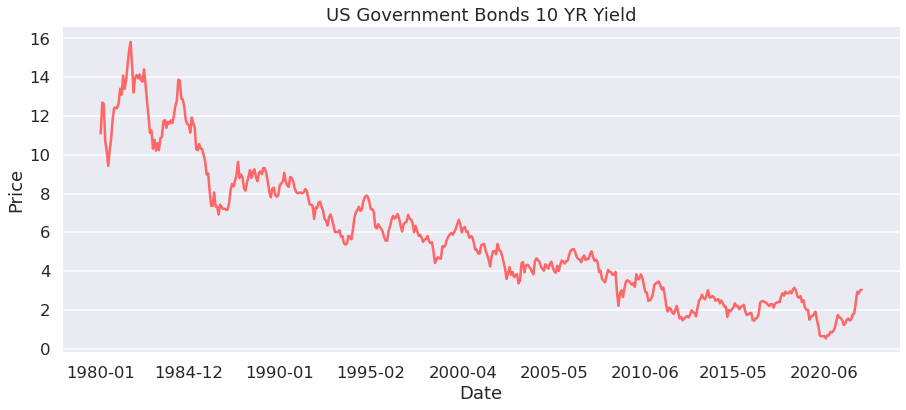

In [586]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

sns.lineplot(data=df, x='Date', y='Price', linewidth=2.5, color=(1, 0.4, 0.4))
sns.despine(left=True)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

# format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax.set_title("US Government Bonds 10 YR Yield")
plt.savefig('bond-yield.png', dpi=500)
plt.show()